In [9]:
import yfinance as yf 

In [10]:
nifty50 = yf.Ticker("^NSEI")

In [11]:
nifty50_data = nifty50.history(period="max")

In [15]:
print(nifty50_data)

                                   Open          High           Low  \
Date                                                                  
2007-09-17 00:00:00+05:30   4518.450195   4549.049805   4482.850098   
2007-09-18 00:00:00+05:30   4494.100098   4551.799805   4481.549805   
2007-09-19 00:00:00+05:30   4550.250000   4739.000000   4550.250000   
2007-09-20 00:00:00+05:30   4734.850098   4760.850098   4721.149902   
2007-09-21 00:00:00+05:30   4752.950195   4855.700195   4733.700195   
...                                 ...           ...           ...   
2024-01-09 00:00:00+05:30  21653.599609  21724.449219  21517.849609   
2024-01-10 00:00:00+05:30  21529.300781  21641.849609  21448.650391   
2024-01-11 00:00:00+05:30  21688.000000  21726.500000  21593.750000   
2024-01-12 00:00:00+05:30  21773.550781  21928.250000  21715.150391   
2024-01-15 00:00:00+05:30  22053.150391  22115.550781  21963.550781   

                                  Close  Volume  Dividends  Stock Splits  
D

In [17]:
nifty50_data.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2024-01-02 00:00:00+05:30', '2024-01-03 00:00:00+05:30',
               '2024-01-04 00:00:00+05:30', '2024-01-05 00:00:00+05:30',
               '2024-01-08 00:00:00+05:30', '2024-01-09 00:00:00+05:30',
               '2024-01-10 00:00:00+05:30', '2024-01-11 00:00:00+05:30',
               '2024-01-12 00:00:00+05:30', '2024-01-15 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=4002, freq=None)

In [19]:
!pip install pandas


<Axes: xlabel='Date'>

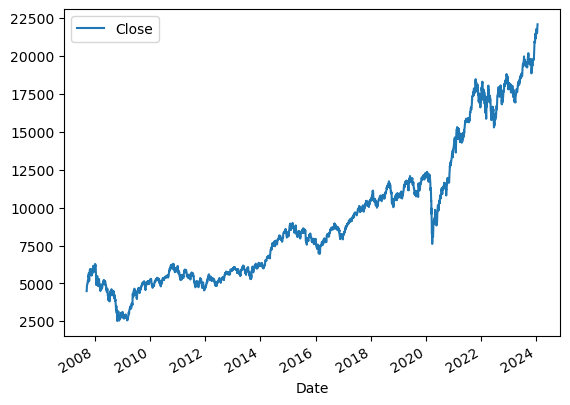

In [21]:
nifty50_data.plot.line(y="Close" , use_index=True)

In [22]:
del nifty50_data["Dividends"]
del nifty50_data["Stock Splits"]

In [23]:
nifty50_data["Tomorrow"] = nifty50_data["Close"].shift(-1)

In [24]:
print(nifty50_data)

                                   Open          High           Low  \
Date                                                                  
2007-09-17 00:00:00+05:30   4518.450195   4549.049805   4482.850098   
2007-09-18 00:00:00+05:30   4494.100098   4551.799805   4481.549805   
2007-09-19 00:00:00+05:30   4550.250000   4739.000000   4550.250000   
2007-09-20 00:00:00+05:30   4734.850098   4760.850098   4721.149902   
2007-09-21 00:00:00+05:30   4752.950195   4855.700195   4733.700195   
...                                 ...           ...           ...   
2024-01-09 00:00:00+05:30  21653.599609  21724.449219  21517.849609   
2024-01-10 00:00:00+05:30  21529.300781  21641.849609  21448.650391   
2024-01-11 00:00:00+05:30  21688.000000  21726.500000  21593.750000   
2024-01-12 00:00:00+05:30  21773.550781  21928.250000  21715.150391   
2024-01-15 00:00:00+05:30  22053.150391  22115.550781  21963.550781   

                                  Close  Volume      Tomorrow  
Date        

In [26]:
nifty50_data["Target"] = (nifty50_data["Tomorrow"] > nifty50_data["Close"]).astype(int)

In [27]:
print(nifty50_data)

                                   Open          High           Low  \
Date                                                                  
2007-09-17 00:00:00+05:30   4518.450195   4549.049805   4482.850098   
2007-09-18 00:00:00+05:30   4494.100098   4551.799805   4481.549805   
2007-09-19 00:00:00+05:30   4550.250000   4739.000000   4550.250000   
2007-09-20 00:00:00+05:30   4734.850098   4760.850098   4721.149902   
2007-09-21 00:00:00+05:30   4752.950195   4855.700195   4733.700195   
...                                 ...           ...           ...   
2024-01-09 00:00:00+05:30  21653.599609  21724.449219  21517.849609   
2024-01-10 00:00:00+05:30  21529.300781  21641.849609  21448.650391   
2024-01-11 00:00:00+05:30  21688.000000  21726.500000  21593.750000   
2024-01-12 00:00:00+05:30  21773.550781  21928.250000  21715.150391   
2024-01-15 00:00:00+05:30  22053.150391  22115.550781  21963.550781   

                                  Close  Volume      Tomorrow  Target  
Date

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = nifty50_data.iloc[:-100]
test = nifty50_data.iloc[:-100]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [30]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [35]:
preds

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [38]:
preds

Date
2007-09-17 00:00:00+05:30    1
2007-09-18 00:00:00+05:30    1
2007-09-19 00:00:00+05:30    1
2007-09-20 00:00:00+05:30    1
2007-09-21 00:00:00+05:30    1
                            ..
2023-08-10 00:00:00+05:30    1
2023-08-11 00:00:00+05:30    1
2023-08-14 00:00:00+05:30    1
2023-08-16 00:00:00+05:30    1
2023-08-17 00:00:00+05:30    1
Length: 3902, dtype: int32

In [39]:
precision_score(test["Target"], preds)

0.7367130008176614

In [41]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

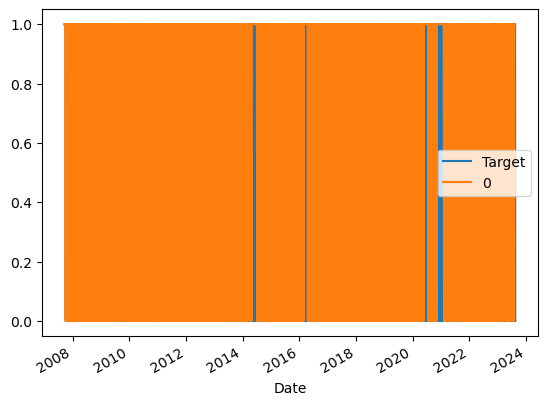

In [42]:
combined.plot()

In [51]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds ,index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [52]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [53]:
predictions = backtest(nifty50_data, model, predictors)

In [54]:
predictions["Predictions"].value_counts()

Predictions
0    758
1    744
Name: count, dtype: int64

In [55]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5403225806451613

In [56]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.548602
0    0.451398
Name: count, dtype: float64

In [58]:
horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons:
    rolling_averages = nifty50_data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizons}"
    nifty50_data[ratio_column] = nifty50_data["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nifty50_data[trend_column] = nifty50_data.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [59]:
nifty50_data

,Open,High,Low,Close,Volume,Tomorrow,Target,"Close_Ratio_[2, 5, 60, 250, 1000]",Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1,NaN,2.0,NaN,NaN,NaN,NaN
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1,NaN,2.0,NaN,NaN,NaN,NaN
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-09 00:00:00+05:30,21653.599609,21724.449219,21517.849609,21544.849609,228600,21618.699219,1,1.360440,1.0,3.0,35.0,143.0,555.0
2024-01-10 00:00:00+05:30,21529.300781,21641.849609,21448.650391,21618.699219,217000,21647.199219,1,1.364296,2.0,4.0,35.0,143.0,555.0
2024-01-11 00:00:00+05:30,21688.000000,21726.500000,21593.750000,21647.199219,212500,21894.550781,1,1.365285,2.0,4.0,36.0,144.0,555.0


In [60]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [61]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds ,index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [65]:
predictions = backtest(nifty50_data, model, new_predictors)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [66]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(train[predictors], train["Target"])
preds = model.predict_proba(test[predictors])[:, 1]


In [67]:
predictions = backtest(nifty50_data, model, new_predictors)

In [68]:
predictions["Predictions"].value_counts()

Predictions
0.0    845
1.0    657
Name: count, dtype: int64

In [70]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5494672754946728